# 911 Calls Project

In this capstone project, 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert) will be analyzed. The dataset provides information on emergency calls across various regions. The objective is to identify patterns and trends within the data.

## Dataset Overview
The dataset includes the following fields:
- `lat`: Latitude
- `lng`: Longitude
- `desc`: Description of the Emergency Call
- `zip`: Zipcode
- `title`: Title of the emergency call
- `timeStamp`: Date and time of the call (YYYY-MM-DD HH:MM:SS)
- `twp`: Township
- `addr`: Address
- `e`: Dummy variable (always 1)


## Data and Setup

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [2]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Data Exploration

Top 5 zipcodes for 911 calls



In [5]:
df['zip'].value_counts().reset_index().head()

,zip,count
0,19401.0,6979
1,19464.0,6643
2,19403.0,4854
3,19446.0,4748
4,19406.0,3174


Top 5 townships (twp) for 911 calls

In [6]:
df['twp'].value_counts().reset_index().head(5)

,twp,count
0,LOWER MERION,8443
1,ABINGTON,5977
2,NORRISTOWN,5890
3,UPPER MERION,5227
4,CHELTENHAM,4575


In [7]:
df['title'].nunique()

110

## Creating new features

In [8]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

What is the most common Reason for a 911 call based off of this new column?

In [9]:
df['Reason'].reset_index().value_counts()

index  Reason 
99491  Traffic    1
0      EMS        1
1      EMS        1
2      Fire       1
99475  Traffic    1
                 ..
8      EMS        1
7      EMS        1
6      EMS        1
5      EMS        1
4      EMS        1
Name: count, Length: 99492, dtype: int64

Using **seaborn** to create a countplot of 911 calls by Reason

<Axes: xlabel='Reason', ylabel='count'>

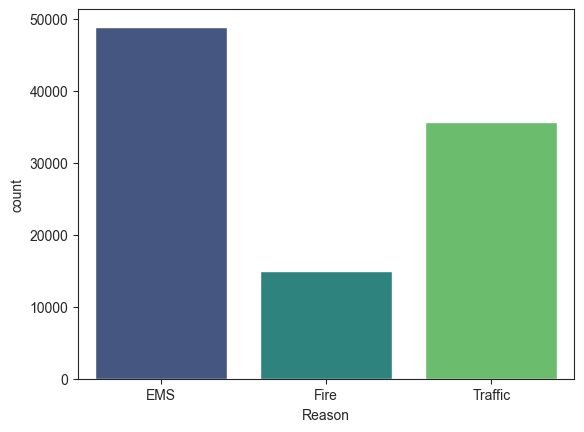

In [10]:
sns.countplot(x='Reason', hue='Reason', data=df, palette='viridis', legend=False)

In [11]:
type(df['timeStamp'].iloc[0])

str

Using [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [13]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [14]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [15]:
df['Day of Week'] = df['Day of Week'].map(dmap)

# Using **Seaborn** to create a countplot of the Day of Week column based off of the Reason column

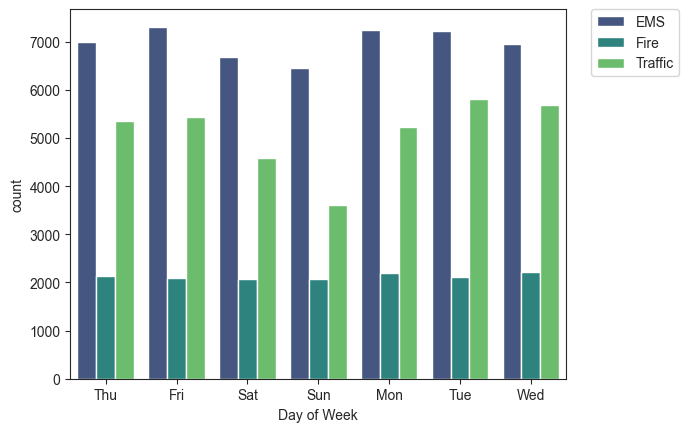

In [16]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

For month

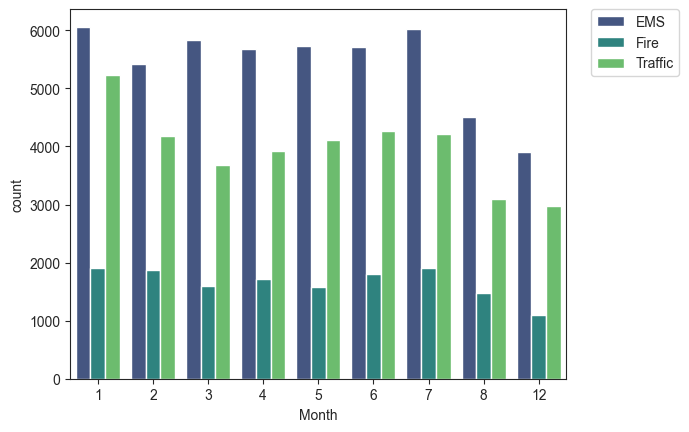

In [17]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [18]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Creating a simple plot off of the dataframe indicating the count of calls per month.

<Axes: xlabel='Month'>

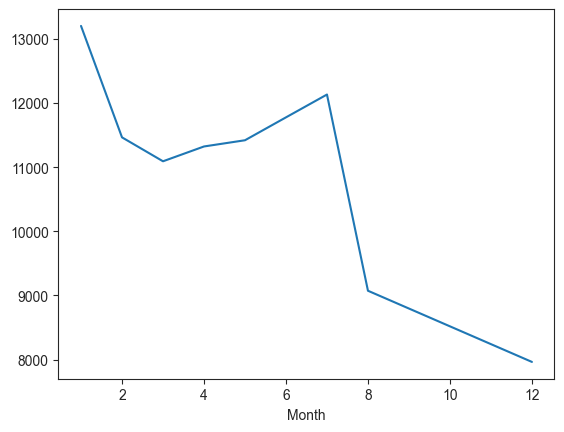

In [19]:
byMonth['twp'].plot()

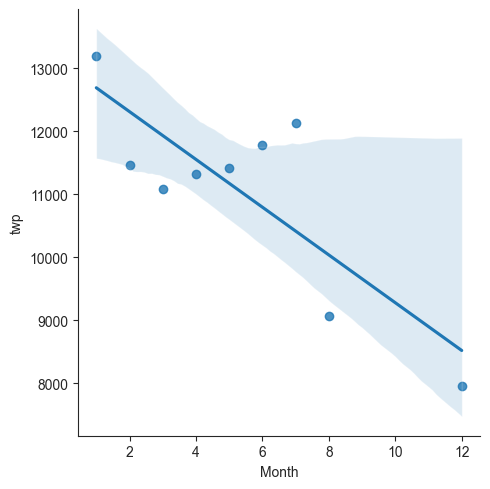

In [20]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [21]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

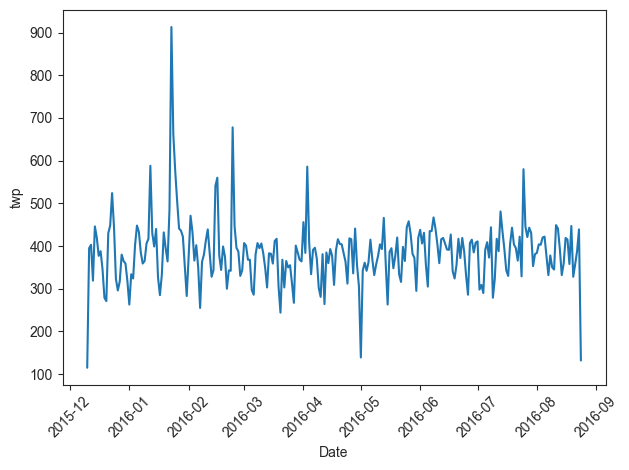

In [22]:
date_group = df.groupby('Date').count()['twp'].reset_index()

# Plot using Seaborn
sns.lineplot(x='Date', y='twp', data=date_group)
plt.xticks(rotation=45)
plt.tight_layout()

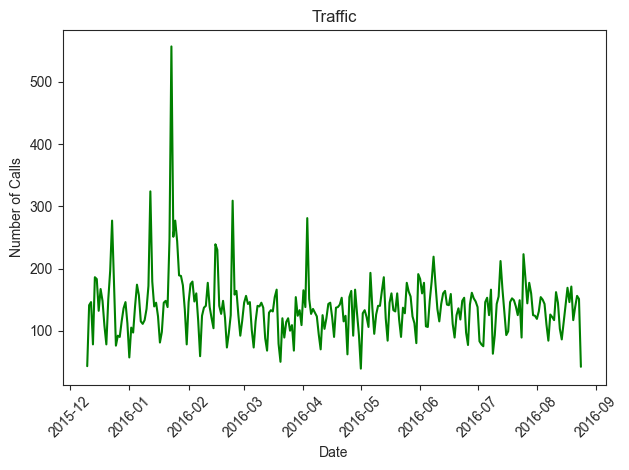

In [23]:
traffic_data = df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].reset_index()

sns.lineplot(x='Date', y='twp', data=traffic_data, color='green')
plt.title('Traffic')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

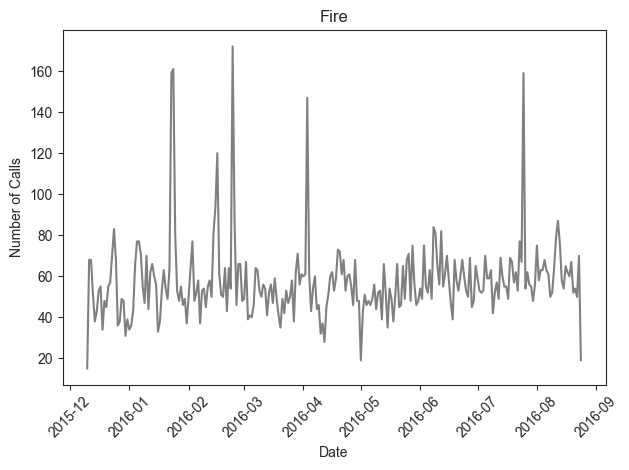

In [24]:
fire_data = df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].reset_index()

sns.lineplot(x='Date', y='twp', data=fire_data,color='Grey')
plt.title('Fire')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

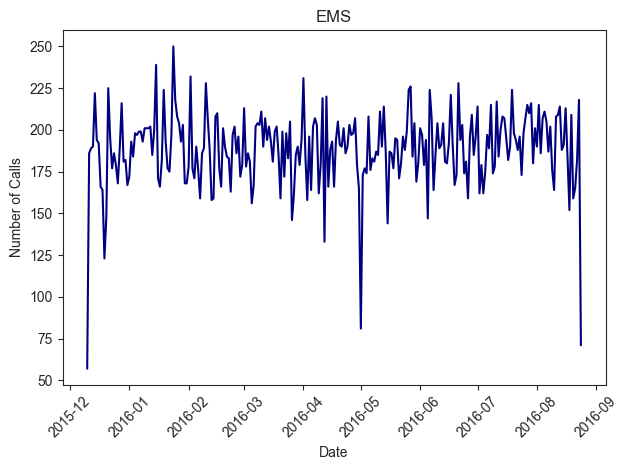

In [25]:
ems_data = df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].reset_index()

sns.lineplot(x='Date', y='twp', data=ems_data,color='Navy')
plt.title('EMS')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


# Creating a HeatMap for this new DataFrame

<Axes: xlabel='Hour', ylabel='Day of Week'>

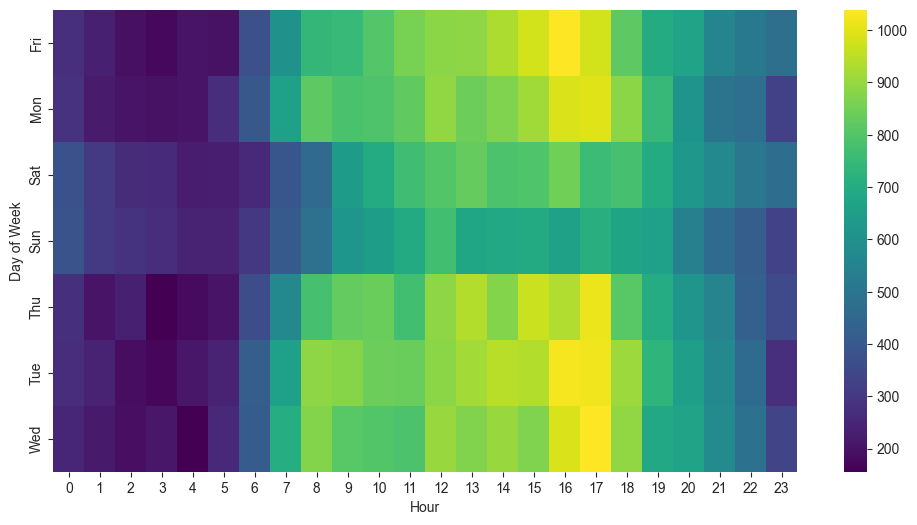

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

# Creating a clustermap using this DataFrame.

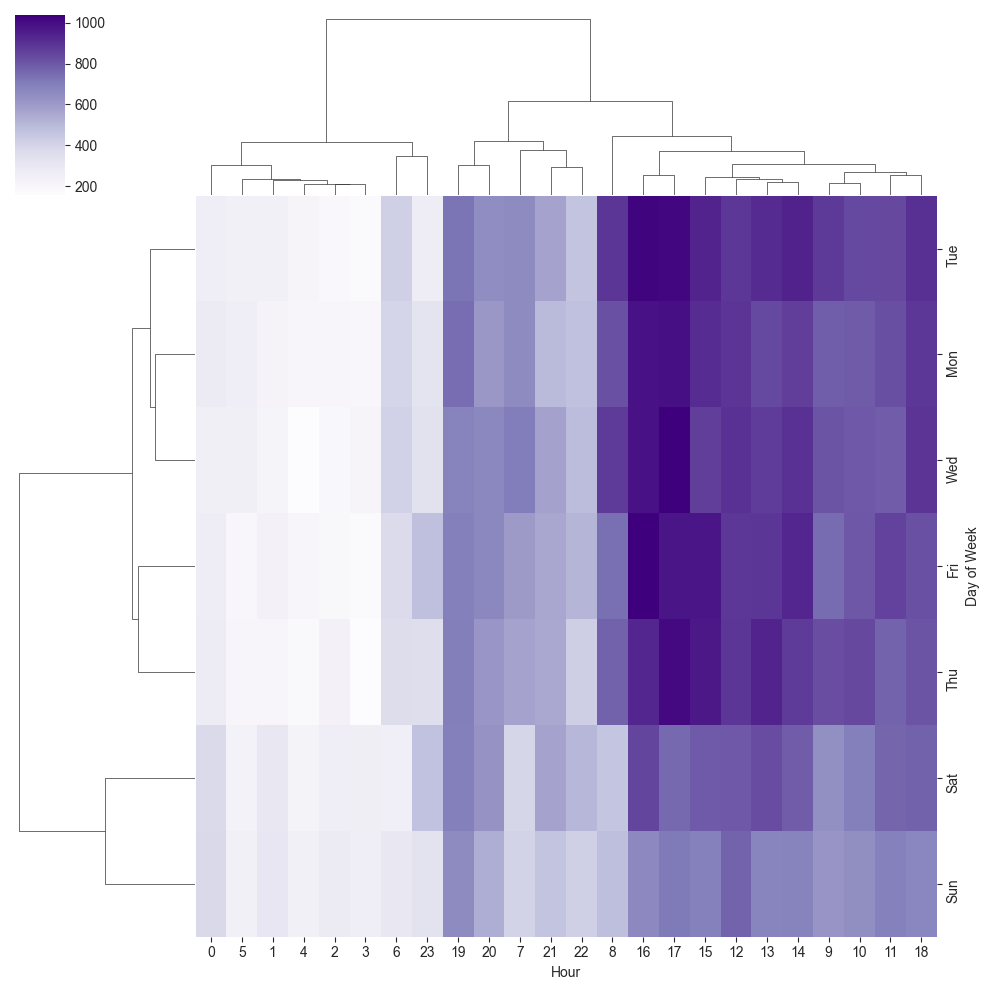

In [28]:
sns.clustermap(dayHour,cmap='Purples')

In [29]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Axes: xlabel='Month', ylabel='Day of Week'>

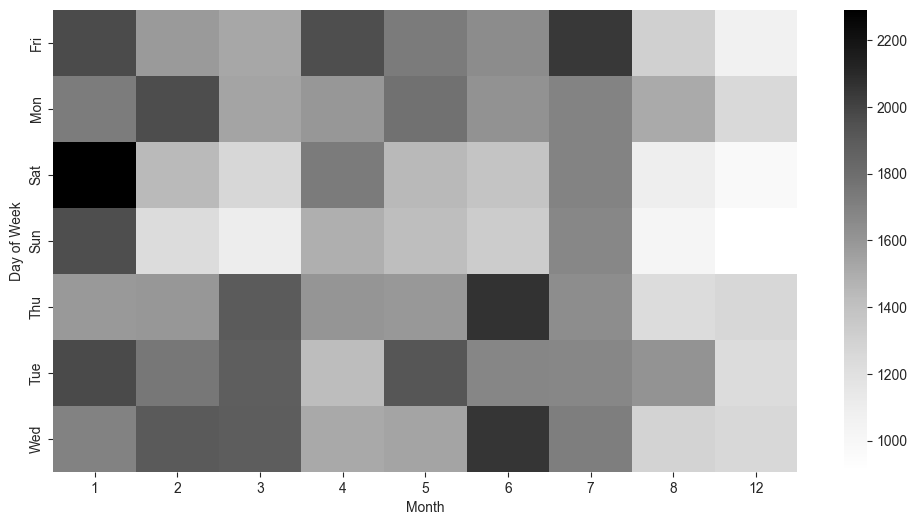

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='Greys')

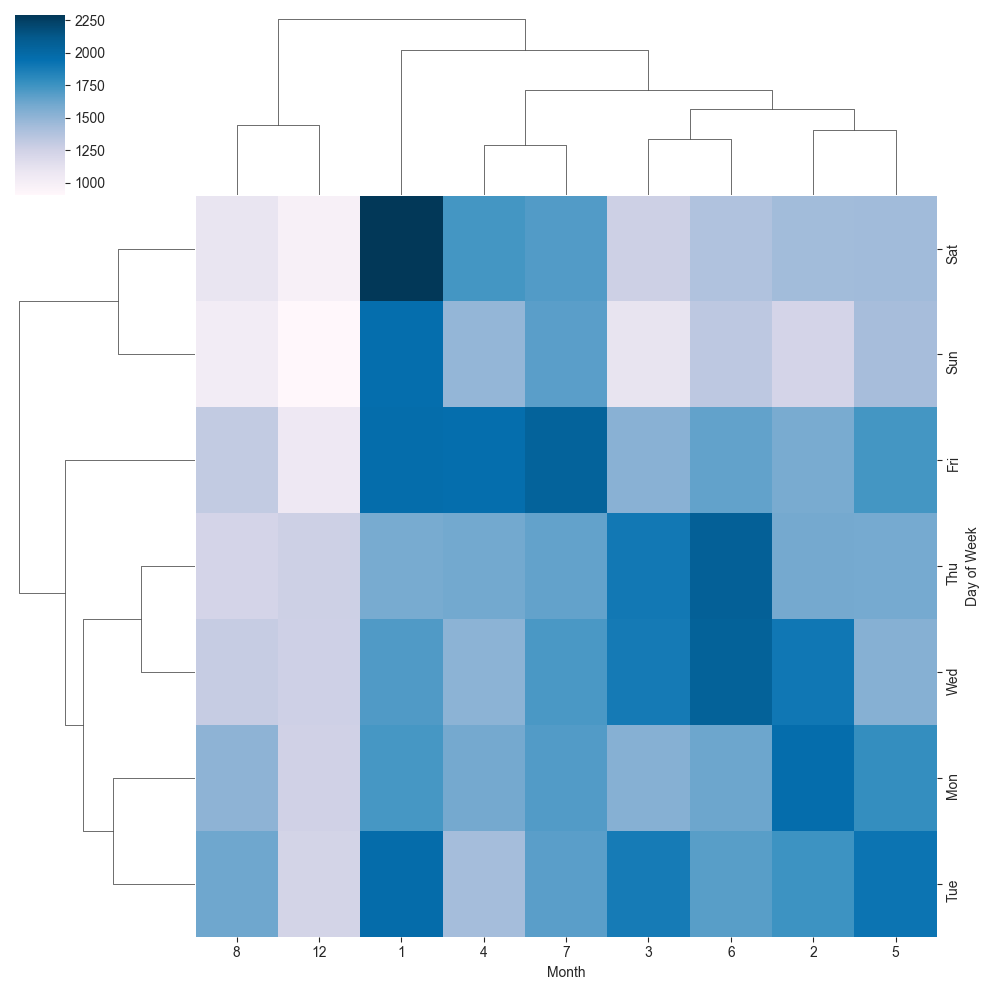

In [31]:
sns.clustermap(dayMonth,cmap='PuBu')

C:\Users\rafik\AppData\Local\Temp\ipykernel_16568\691734895.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_by_month.index, y=traffic_by_month.values, palette='Purples_d')


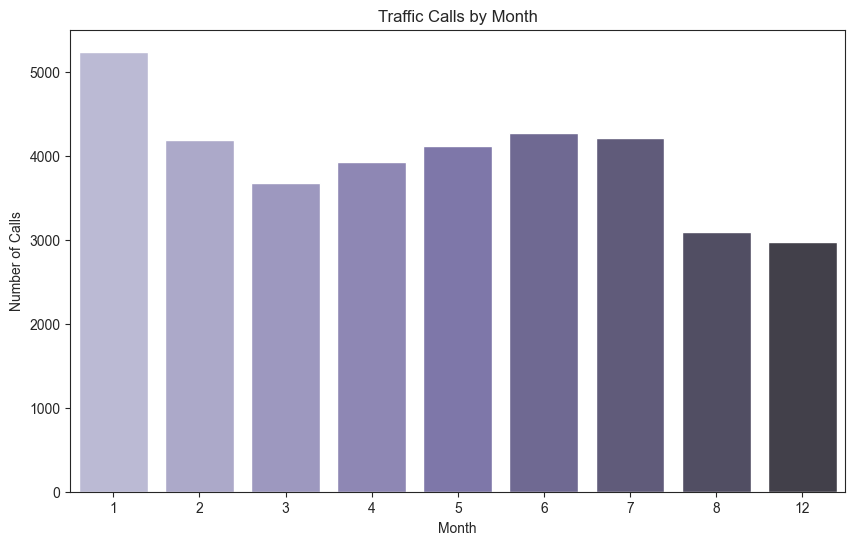

In [32]:
traffic_by_month = df[df['Reason'] == 'Traffic'].groupby('Month').count()['twp']

plt.figure(figsize=(10,6))
sns.barplot(x=traffic_by_month.index, y=traffic_by_month.values, palette='Purples_d')
plt.title('Traffic Calls by Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.show()

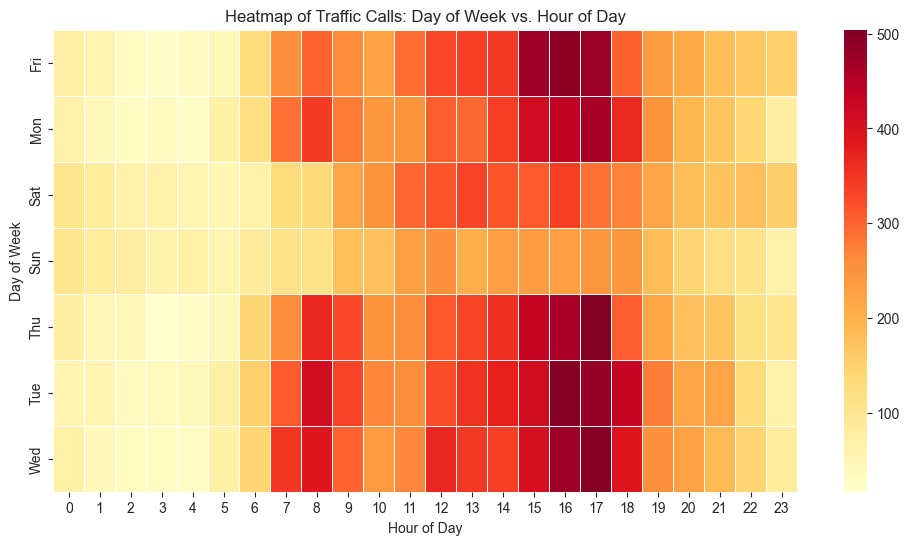

In [33]:
traffic_day_hour = df[df['Reason'] == 'Traffic'].groupby(by=['Day of Week', 'Hour']).count()['twp'].unstack()

plt.figure(figsize=(12,6))
sns.heatmap(traffic_day_hour, cmap='YlOrRd', linewidths=0.5)
plt.title('Heatmap of Traffic Calls: Day of Week vs. Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

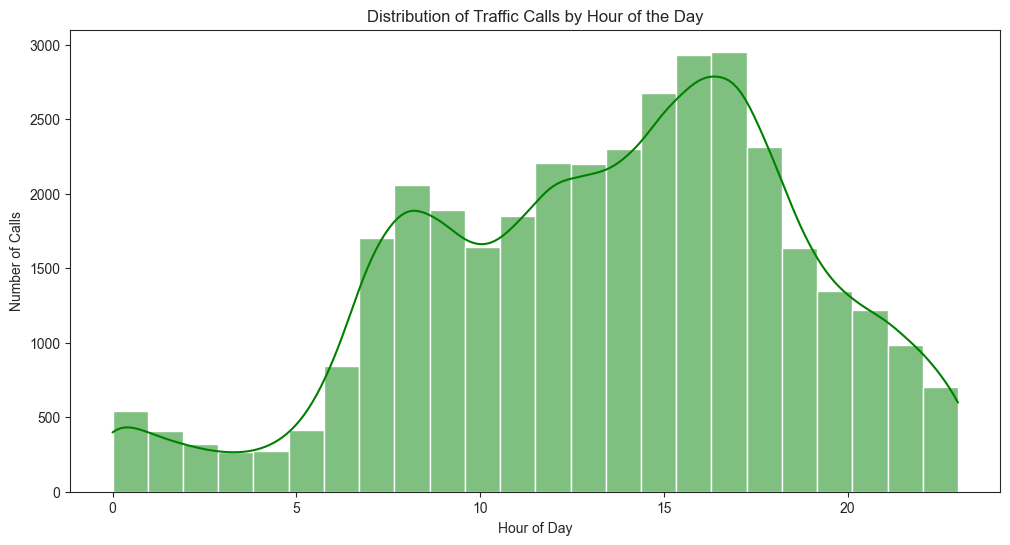

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Reason'] == 'Traffic']['Hour'], bins=24, kde=True, color='green')
plt.title('Distribution of Traffic Calls by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.show()

# Top 10 townships with the most calls

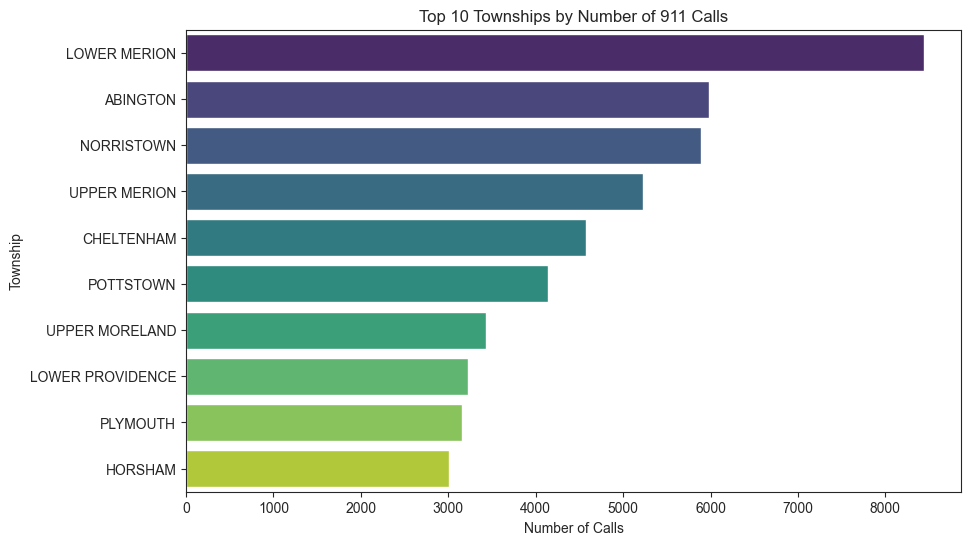

In [35]:
top_townships = df['twp'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_townships.values, y=top_townships.index, hue=top_townships.index, palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Townships by Number of 911 Calls')
plt.xlabel('Number of Calls')
plt.ylabel('Township')
plt.show()

# Conclusion

This analysis of 911 call data revealed key insights into the patterns and trends of emergency calls. We found that:

**EMS calls** were the most frequent, followed by traffic-related incidents and fire emergencies.
Call volumes exhibited weekly and monthly variations, with certain days (e.g., **Fridays**) and months (e.g., **January**) experiencing higher call frequencies.

Specific townships emerged as hotspots for 911 calls, indicating potential areas for focused resource allocation.

The visualizations generated in this notebook effectively communicate these findings, providing a clear picture of the distribution and trends in 911 call data. These insights can serve as a valuable foundation for further investigation and potential optimization of emergency response strategies.